In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ModelSystem as MS
import Utilities as UT
import pyemma.msm as pymsm

In [34]:
msys = MS.MS()
pi = msys.StatDist()
sysT = pymsm.markov_model(msys.TransitionMatrix())

Timescales:
[         -inf  106.44862038   33.63705777    5.37663155    2.03285667
    1.71535993]


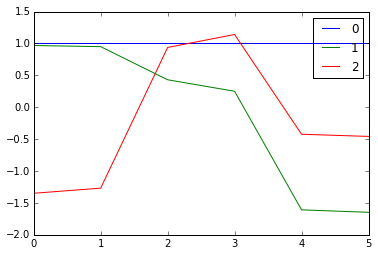

In [15]:
R, L = msys.Eigenvectors()
plt.figure()
for k in range(3):
    plt.plot(R[:, k], label="%d"%k)
plt.legend()
print "Timescales:"
print msys.Timescales()

In [37]:
# Path
trajpath = "DiscTrajs/"
# Number of trajectories:
ntraj = 25000
# Length of trajectories:
T = 200
# Starting distribution:
p0 = np.array([0.2, 0.2, 0.4, 0.2, 0, 0])
# Simulate:
for j in range(ntraj):
    jtraj = msys.Simulate(T, p0)
    np.save(trajpath + "DiscTraj%d.npy"%j, jtraj)
    if np.remainder(j, 1000)== 0:
        print "Finished %d trajectories."%j

Finished 0 trajectories.
Finished 1000 trajectories.
Finished 2000 trajectories.
Finished 3000 trajectories.
Finished 4000 trajectories.
Finished 5000 trajectories.
Finished 6000 trajectories.
Finished 7000 trajectories.
Finished 8000 trajectories.
Finished 9000 trajectories.
Finished 10000 trajectories.
Finished 11000 trajectories.
Finished 12000 trajectories.
Finished 13000 trajectories.
Finished 14000 trajectories.
Finished 15000 trajectories.
Finished 16000 trajectories.
Finished 17000 trajectories.
Finished 18000 trajectories.
Finished 19000 trajectories.
Finished 20000 trajectories.
Finished 21000 trajectories.
Finished 22000 trajectories.
Finished 23000 trajectories.
Finished 24000 trajectories.


In [38]:
# Load all the trajectories into a matrix:
TM = np.zeros((T, ntraj))
for j in range(ntraj):
    TM[:, j] = np.load(trajpath + "DiscTraj%d.npy"%j)
    if np.remainder(j, 5000)== 0:
        print "Loaded %d trajectories."%j

Loaded 0 trajectories.
Loaded 5000 trajectories.
Loaded 10000 trajectories.
Loaded 15000 trajectories.
Loaded 20000 trajectories.


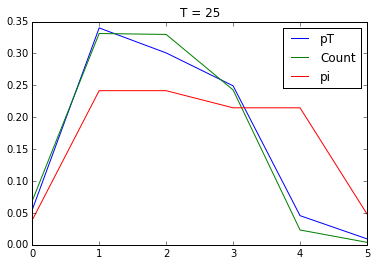

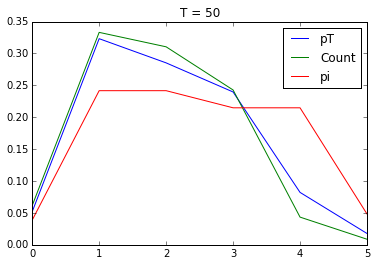

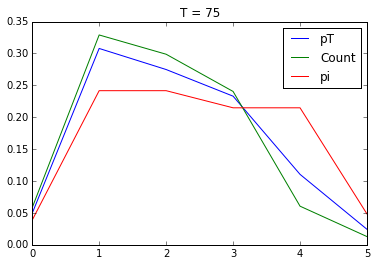

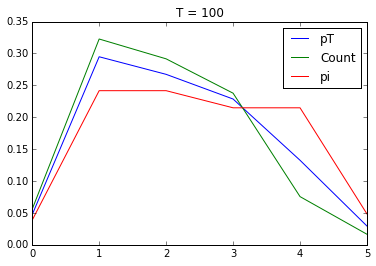

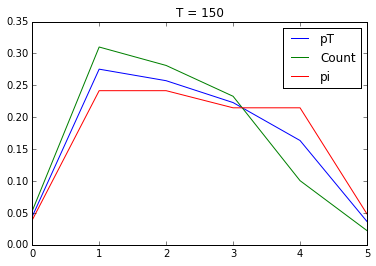

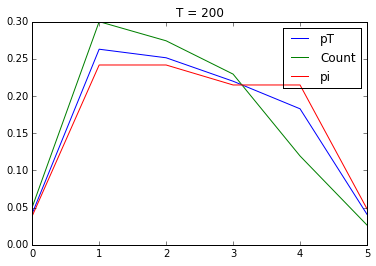

In [41]:
# Compute average frequencies of all states:
TM = TM.astype(np.int64)
Tarray = np.array([25, 50, 75, 100, 150, 200], dtype=int)
for jT in Tarray:
    # Determine the frequencies:
    freq = UT.Frequencies(TM[:jT, :], 6)
    # Determine pT:
    pT = sysT.propagate(p0, jT)
    plt.figure()
    plt.plot(pT, label="pT")
    plt.plot(freq, label="Count")
    plt.plot(pi, label="pi")
    plt.legend()
    plt.title("T = %d"%jT)